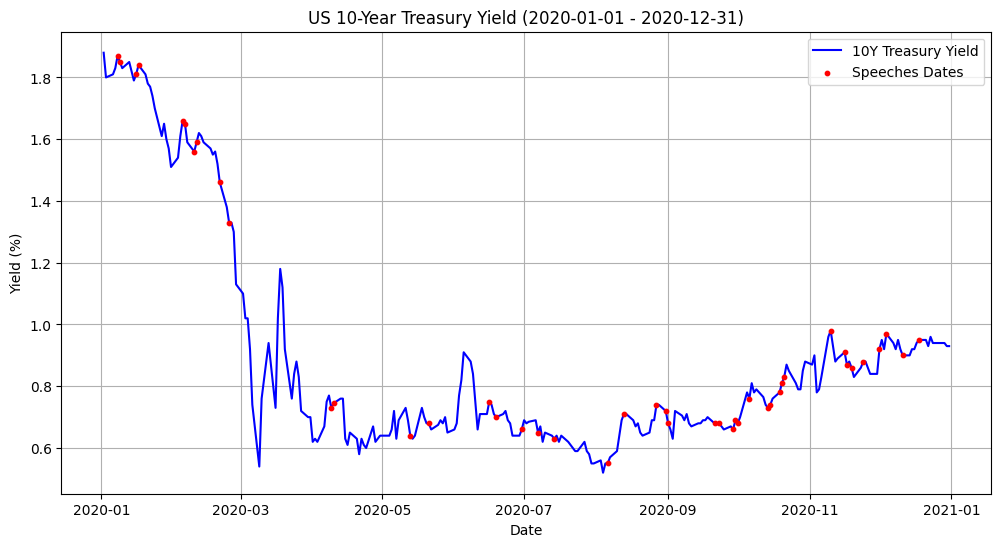

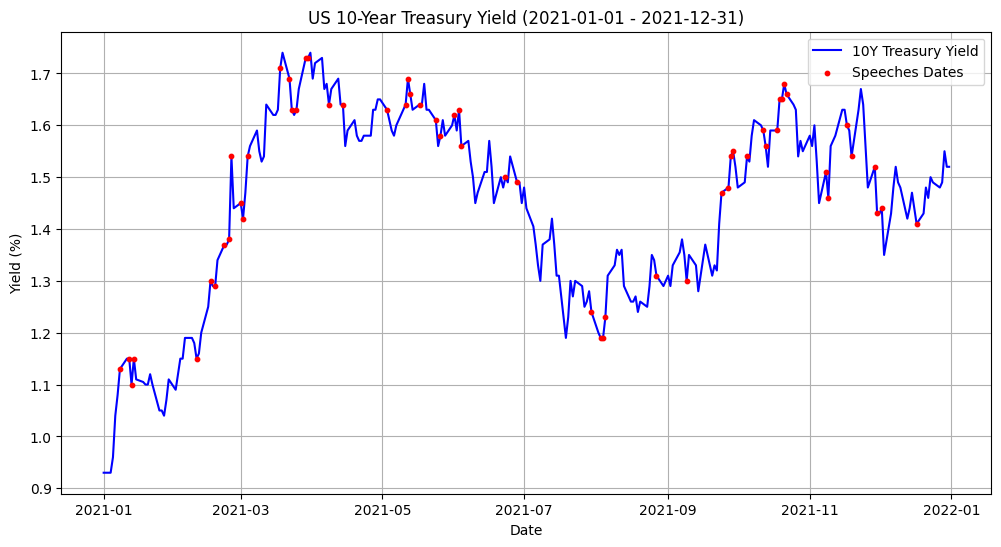

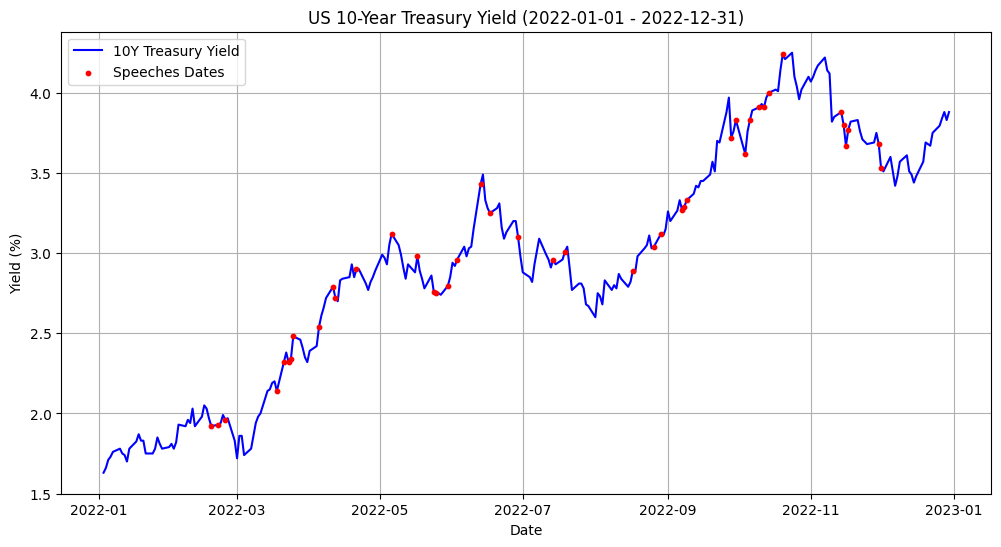

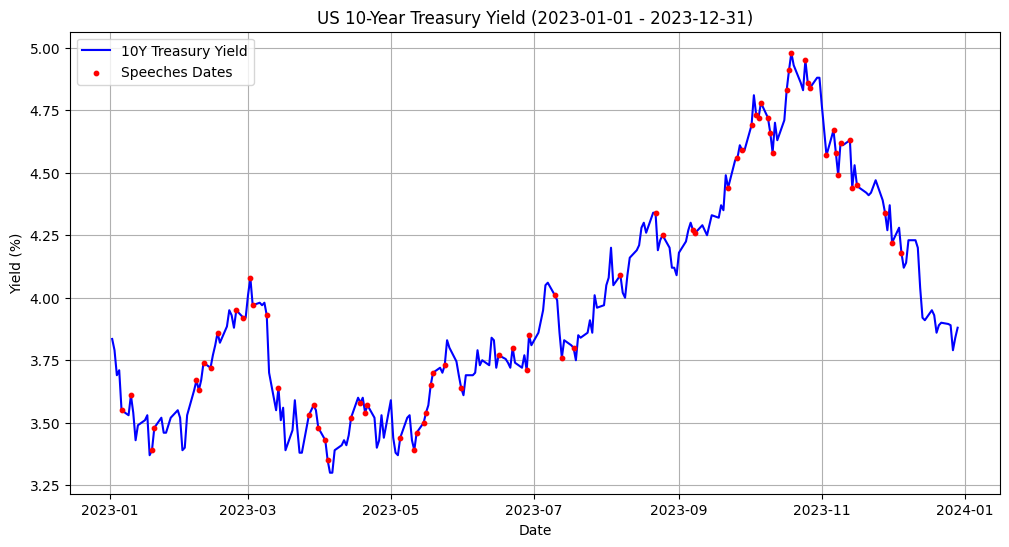

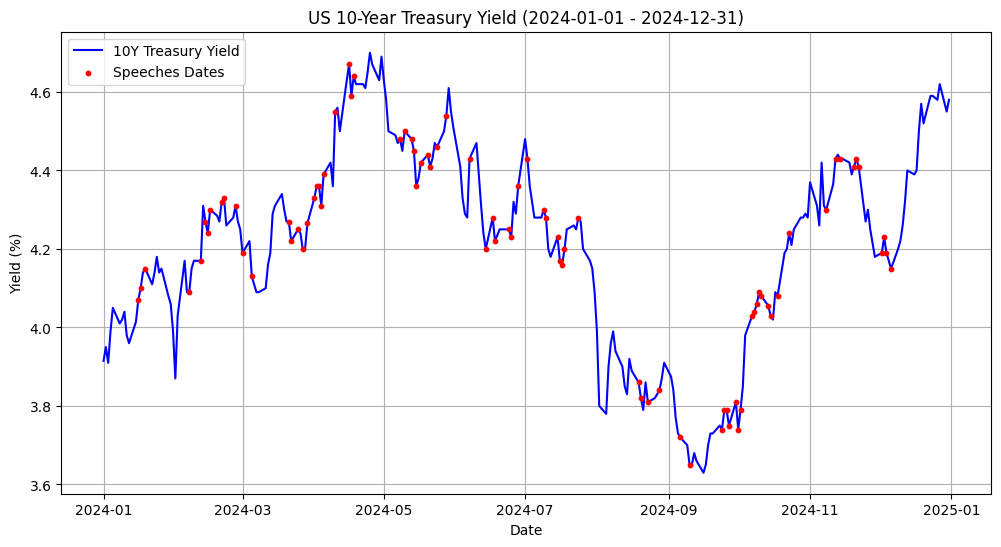

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from fredapi import Fred
from dotenv import load_dotenv
import os

# Loading data from CSV files
load_dotenv()
api_key=os.getenv('FRED_API_KEY')
df_fed = pd.read_csv("2020-2024fed.csv")
df_sentiment = pd.read_csv("2020-2024sentiment.csv")
df_prices = pd.read_csv("2020-2024prices.csv")
df_speech = pd.read_csv("2020-2024speeches.csv")

# Create a dictionary containing the dates and speaker names of the speeches
events = dict(zip(df_fed['date'], df_fed['speaker']))

# Download US treasury bond data from the FRED database
start_date = '2020-01-01'
end_date = '2024-12-31'

fred = Fred(api_key=api_key)
data = fred.get_series('DGS10', observation_start=start_date, observation_end=end_date)

# Convert to DataFrame for better visualization
df_bond = pd.DataFrame(data, columns=['Yield'])
df_bond.index.name = 'Date'
df_bond.index = pd.to_datetime(df_bond.index)  # Convert index to datetime

# Interpolate missing data
df_bond['Yield'] = df_bond['Yield'].interpolate(method='linear')

# Convert event dates to datetime format
event_dates = pd.to_datetime(list(events.keys()))

# Check which event dates are present in the bond dataset
valid_event_dates = [date for date in event_dates if date in df_bond.index]

# Extract interest rates for the valid dates
bond_values = df_bond.loc[valid_event_dates, 'Yield']

# Function to plot the Treasury bond yield within a specific date range
def plot_bond_yield(start_date, end_date):
    # Convert the dates to datetime format
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # Filter yield data for the specified date range
    df_bond_filtered = df_bond[(df_bond.index >= start_date) & (df_bond.index <= end_date)]
    
    # Filter the speech dates that fall within the specified range
    event_dates_filtered = [date for date in valid_event_dates if start_date <= date <= end_date]
    
    # Extract the interest rates for these dates
    bond_values_filtered = df_bond.loc[event_dates_filtered, 'Yield']
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    plt.plot(df_bond_filtered.index, df_bond_filtered['Yield'], label='10Y Treasury Yield', color='blue')
    plt.scatter(event_dates_filtered, bond_values_filtered, color='red', s=10, zorder=5, label='Speeches Dates')
    
    plt.title(f'US 10-Year Treasury Yield ({start_date.date()} - {end_date.date()})')
    plt.xlabel('Date')
    plt.ylabel('Yield (%)')
    plt.legend()
    plt.grid(True)
    
    plt.show()

plot_bond_yield('2020-01-01', '2020-12-31')
plot_bond_yield('2021-01-01', '2021-12-31')
plot_bond_yield('2022-01-01', '2022-12-31')
plot_bond_yield('2023-01-01', '2023-12-31')
plot_bond_yield('2024-01-01', '2024-12-31')
